In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
df = pd.read_excel('/content/Jul.xlsx', usecols=['Wind', 'Wind.1'], skiprows=[1])
df.columns = ['speed', 'direction']
dt_o = pd.Timestamp('07-01-2014 00:00')
dt_f = pd.Timestamp('07-31-2014 23:00')
df.index = pd.date_range(start=dt_o, end = dt_f, freq = 'h')
df

,speed,direction
2014-07-01 00:00:00,1.3,NE
2014-07-01 01:00:00,0.4,ENE
2014-07-01 02:00:00,0.9,SSE
2014-07-01 03:00:00,0.9,ESE
2014-07-01 04:00:00,0.0,SSW
...,...,...
2014-07-31 19:00:00,0.0,SSW
2014-07-31 20:00:00,0.4,SW
2014-07-31 21:00:00,0.4,SW
2014-07-31 22:00:00,0.4,SW


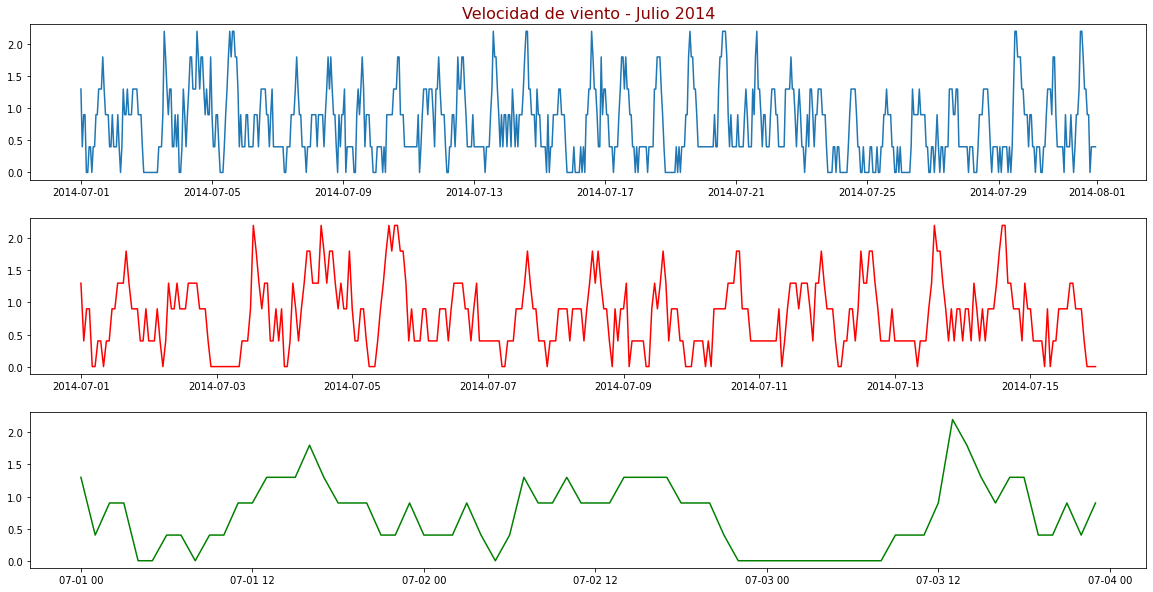

In [3]:
fig, axes = plt.subplots(3,1, figsize=(20,10))

axes[0].plot(df.index, df['speed']); axes[0].set_title('Velocidad de viento - Julio 2014', color='darkred', fontsize=16)
axes[1].plot(df['07-01-2014':'07-15-2014'].index, df['speed']['07-01-2014':'07-15-2014'], color = 'red')
axes[2].plot(df['07-01-2014':'07-03-2014'].index, df['speed']['07-01-2014':'07-03-2014'], color = 'green')
plt.subplots_adjust(hspace=0.25)

In [4]:
!pip install windrose

In [5]:
df['direction']

2014-07-01 00:00:00     NE
2014-07-01 01:00:00    ENE
2014-07-01 02:00:00    SSE
2014-07-01 03:00:00    ESE
2014-07-01 04:00:00    SSW
                      ... 
2014-07-31 19:00:00    SSW
2014-07-31 20:00:00     SW
2014-07-31 21:00:00     SW
2014-07-31 22:00:00     SW
2014-07-31 23:00:00    SSW
Freq: H, Name: direction, Length: 744, dtype: object

In [6]:
convert = pd.DataFrame({'Cardinal': ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W','WNW', 'NW', 'NNW'],
                        'Grados': np.arange(0, 360, 22.5).astype(float)})
convert = convert.append({'Cardinal': '---', 'Grados': 99}, ignore_index=True)
convert

,Cardinal,Grados
0,N,0.0
1,NNE,22.5
2,NE,45.0
3,ENE,67.5
4,E,90.0
5,ESE,112.5
6,SE,135.0
7,SSE,157.5
8,S,180.0
9,SSW,202.5


In [7]:
df['dir_degree'] = [x for x in np.full(len(df), fill_value=1)]
for i in df.index:
  df['dir_degree'][i] = convert[convert['Cardinal'] == df['direction'][i]]['Grados']
  df['dir_degree'].replace(99, np.NaN)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,speed,direction,dir_degree
2014-07-01 00:00:00,1.3,NE,45
2014-07-01 01:00:00,0.4,ENE,67
2014-07-01 02:00:00,0.9,SSE,157
2014-07-01 03:00:00,0.9,ESE,112
2014-07-01 04:00:00,0.0,SSW,202
...,...,...,...
2014-07-31 19:00:00,0.0,SSW,202
2014-07-31 20:00:00,0.4,SW,225
2014-07-31 21:00:00,0.4,SW,225
2014-07-31 22:00:00,0.4,SW,225


In [9]:
import windrose

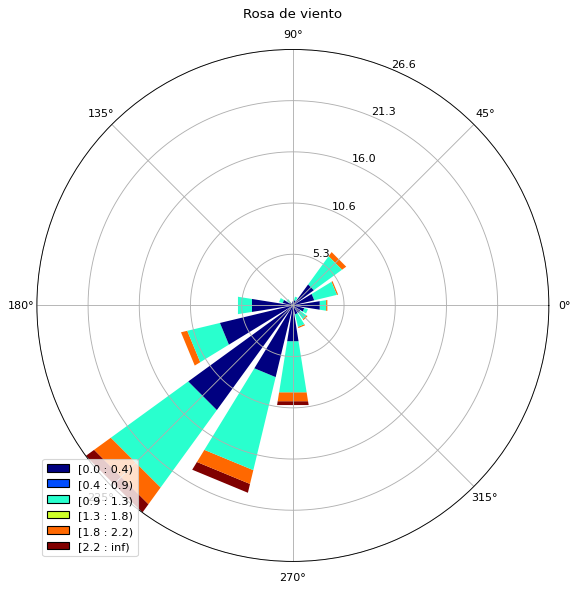

In [10]:
ax = windrose.WindroseAxes.from_ax()
ax.bar(df['dir_degree'], df['speed'], normed = True)
ax.set_title('Rosa de viento')
ax.legend()